**Libraries Imported**

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Flatten
from joblib import dump

**Loading the MNIST Dataset**

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


**Visualizing the count of labels in the dataset**

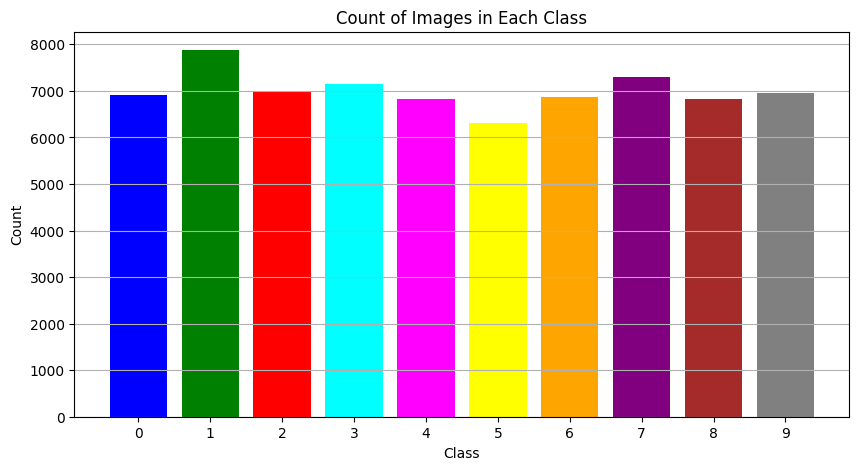

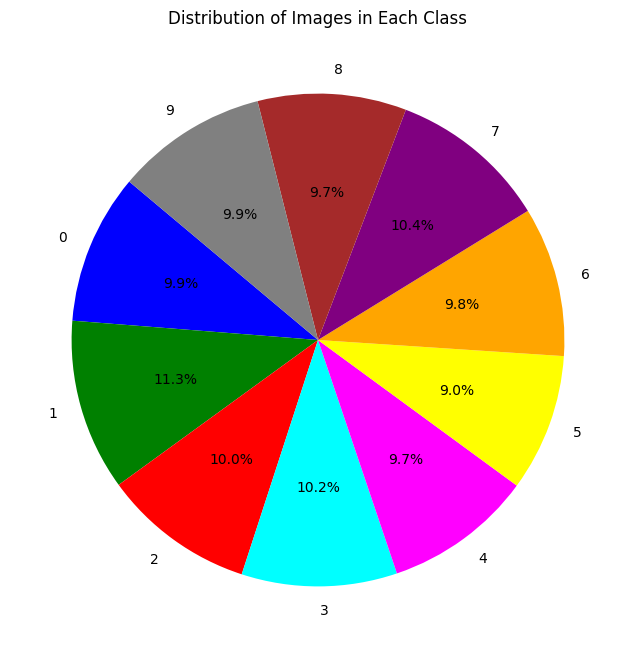

In [46]:
# Combine training and test sets for analysis
all_labels = np.concatenate((y_train, y_test))

# Count occurrences of each class
class_counts = np.bincount(all_labels)

# Define colors for each class
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'brown', 'gray']

# Plot bar chart with different colors
plt.figure(figsize=(10, 5))
plt.bar(range(10), class_counts, color=colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Images in Each Class')
plt.xticks(range(10))
plt.grid(axis='y')
plt.show()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=range(10), autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Images in Each Class')
plt.show()


**Displaying sample data**

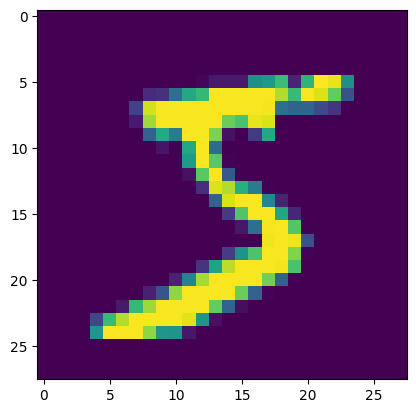

Label: 5


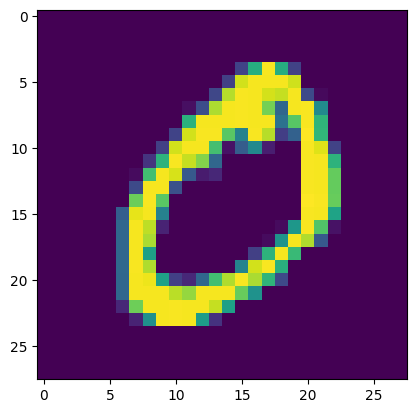

Label: 0


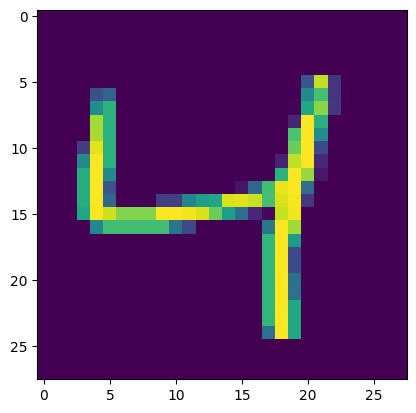

Label: 4


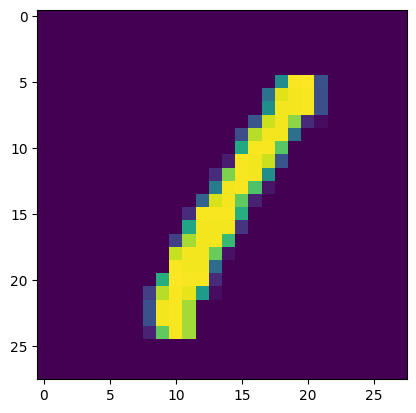

Label: 1


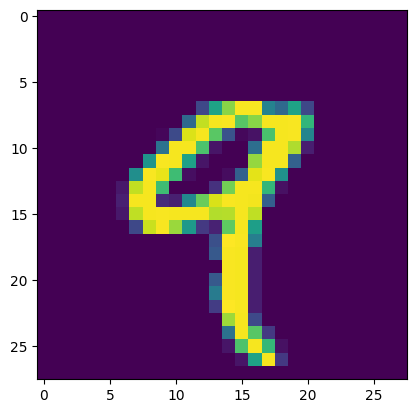

Label: 9


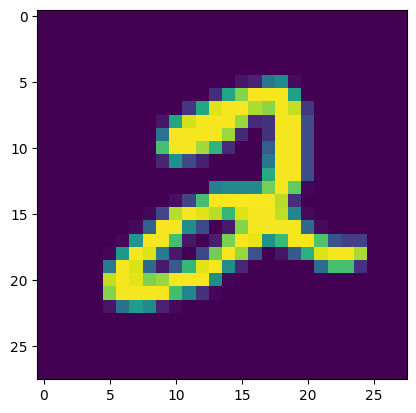

Label: 2


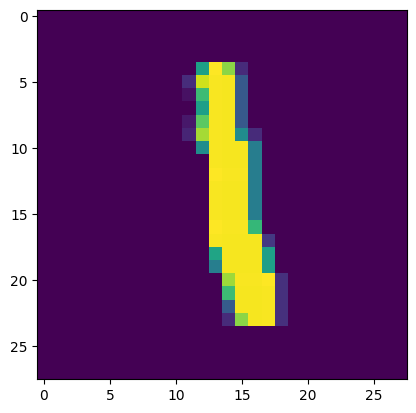

Label: 1


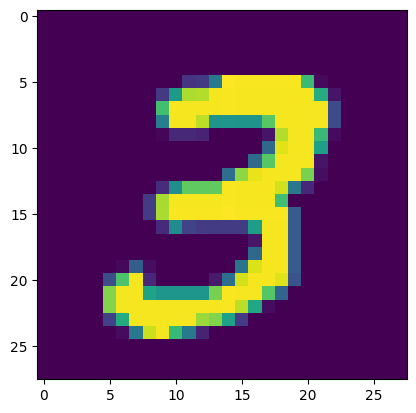

Label: 3


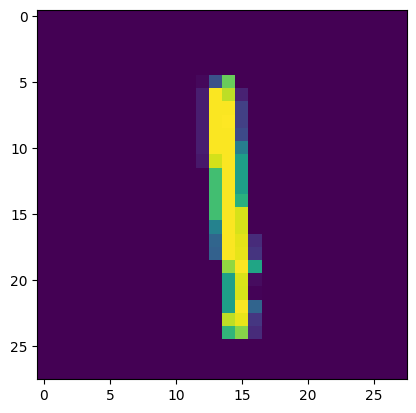

Label: 1


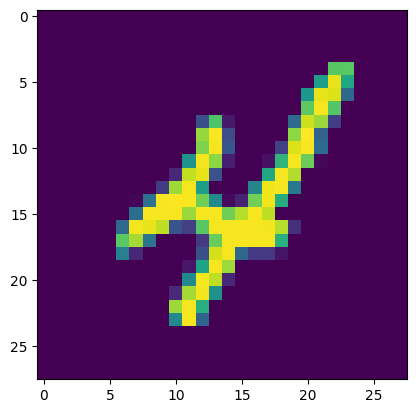

Label: 4


In [12]:
for i in range(10):
  plt.imshow(X_train[i])
  plt.show()
  print('Label:', y_train[i])

In [14]:
print('Training Labels:', np.unique(y_train))
print('Testing Labels:', np.unique(y_test))

Training Labels: [0 1 2 3 4 5 6 7 8 9]
Testing Labels: [0 1 2 3 4 5 6 7 8 9]


**Scaling the data features in the scale of 0 to 1**

In [15]:
X_train = X_train / 255
X_test = X_test / 255

**Model Architecture**

In [18]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Training the model**

In [26]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0893 - val_accuracy: 0.9872
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.0912 - val_accuracy: 0.9865
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.0976 - val_accuracy: 0.9862
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.0906 - val_accuracy: 0.9863
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.1009 - val_accuracy: 0.9845
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0994 - val_accuracy: 0.9863
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0065 - accuracy: 0.9977 - val_loss: 0.1017 - val_accuracy:

**Visualizing the Model Loss and Accuracy**

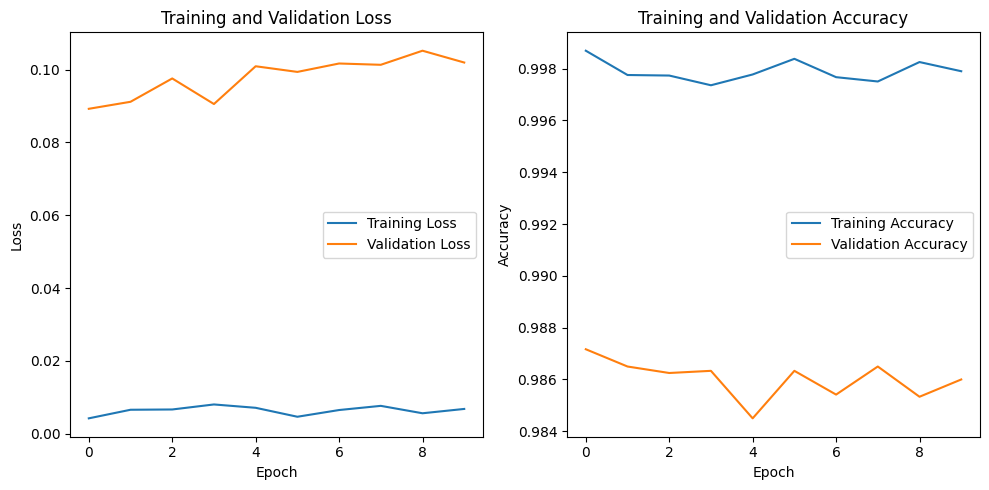

In [27]:
# Extracting training/validation loss and accuracy from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Creating a figure
plt.figure(figsize=(10, 5))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

**Prediction on Test data**

In [28]:
y_pred = model.predict(X_test)

313/313 [==============================] - 3s 4ms/step


In [29]:
y_pred = np.argmax(y_pred, axis=1)

**Classification Report**

In [34]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.95      0.98      0.96       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Confusion Matrix**

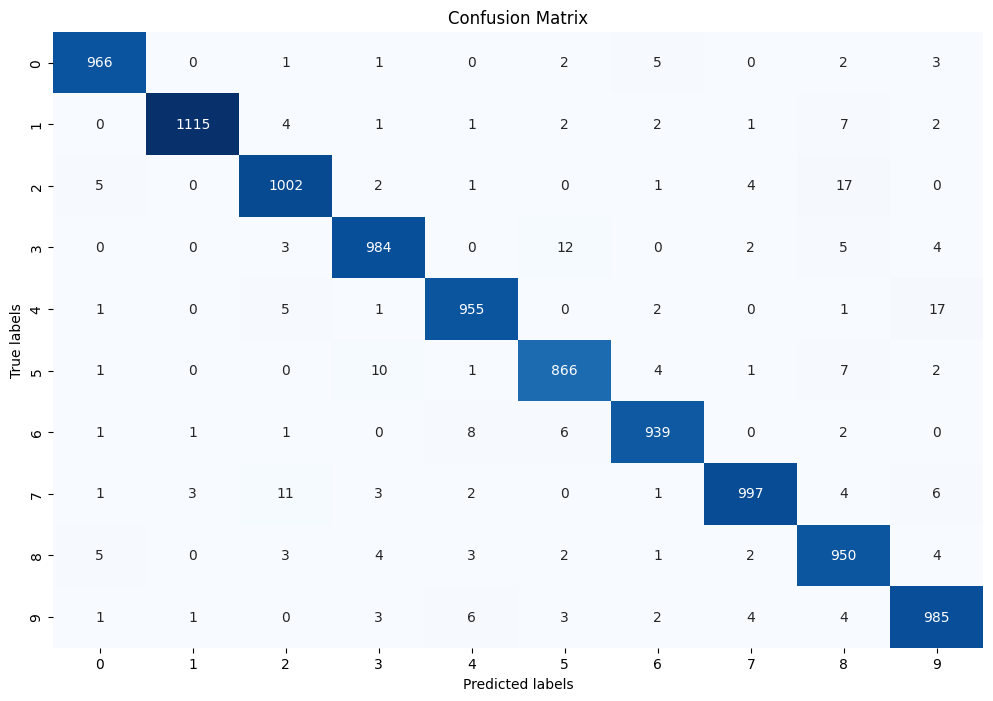

In [39]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Saving the Model**

In [43]:
dump(model, 'model.joblib')

['model.joblib']